# Regresja liniowa

Naszym Celem jest empityczne sprawdzenie twierdzenia:

Niech $A \in \mathbb{R}^{N\times K}$ będzie macierzą która przekształca $\mathbb{R}^{K}$ w $\mathbb{R}^N$, i niech $y \in \mathbb{R}^{K}$.

Wtedy punkt $x_0 \in \mathbb{R}^K$ spełnia

$$
x_0 = \mathrm{argmin} \{ x \in \mathbb{R}^K   \colon \| Ax - y \|^2 \}
$$

wtedy i tylko wtedy gdy

$$
A^TA x_0 = A^Ty.
$$


In [1]:
import numpy as np
import scipy.stats as st
import sklearn.linear_model as lm
import matplotlib.pyplot as plt

Proszę wykres funkcji w kształcie 

$
f(x)=x^2
$ 

na odcinku $[0,3]$ i go narysować.

Będzie to model, który będziemy chcieli znaleźć.

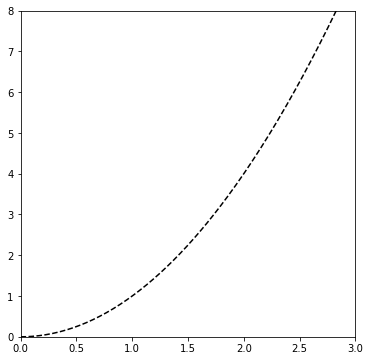

In [2]:
f = lambda x: (x**2)
x_tr = np.linspace(0., 3, 200)
y_tr = f(x_tr)
plt.figure(figsize=(6,6))
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr[:200], y_tr[:200], '--k')
plt.show()

Proszę wylosować kilka punktów z otoczenia funkcji $f(x)=x^2$.

Na ich podstawie będziemy wykonywać naszej presykcji.

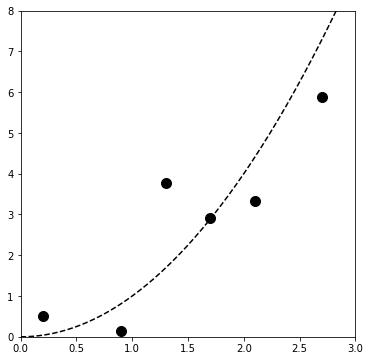

In [3]:
x = np.array([.2, .5, .8, .9, 1.3, 1.7, 2.1, 2.7])
y = f(x) + np.random.randn(len(x))
plt.figure(figsize=(6,6))
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr, y_tr, '--k')
plt.plot(x, y, 'ok', ms=10)
plt.show()

Nauczmy prosty model regresji liniowej

$$
y=a\cdot x + b
$$

na naszych danych.

Oraz narysujmy prostą regresji.

In [4]:
# We create the model.
lr = lm.LinearRegression()
# We train the model on our training dataset.
lr.fit(x[:, np.newaxis], y)
print(lr.coef_)
print(lr.intercept_)

[2.44620187]
-1.129329466209334


Definiujemy naszą funkcję regresji

In [5]:
f_lr = lambda x: lr.coef_ * x +lr.intercept_

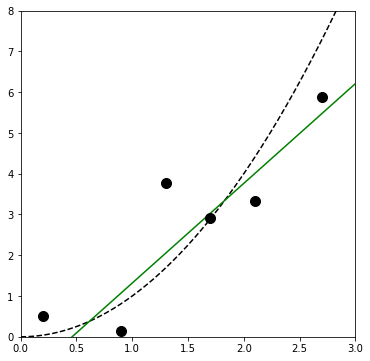

In [6]:
x_f_lr = np.linspace(0., 3, 200)
y_f_lr = f_lr(x_tr)
plt.figure(figsize=(6,6))
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr, y_tr, '--k')
plt.plot(x_f_lr, y_f_lr, 'g')
plt.plot(x, y, 'ok', ms=10)
plt.show()

Teraz możemy wykonać predykcję dla punktu 
$$
x_0 = 1.5
$$

In [7]:
point = np.array([1.5])
y_point = lr.predict(point[:, np.newaxis])

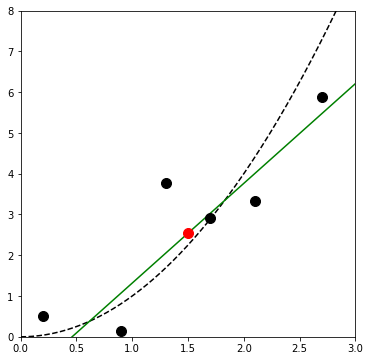

In [8]:
plt.figure(figsize=(6,6))
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr, y_tr, '--k')
plt.plot(x_f_lr, y_f_lr, 'g')
plt.plot(x, y, 'ok', ms=10)
plt.plot(point, y_point, 'or', ms=10)
plt.show()

Możemy wypisać miarę dopasowania $R^2$. Narazie nie wnikamy w to co ona oznacza.

In [9]:
from sklearn.metrics import r2_score
print(lr.score(x[:, np.newaxis], y))
print(r2_score(lr.predict(x[:, np.newaxis]), y))

0.8071878055245403
0.7611309373657309


# Zadanie 1
Stwórz macierz postaci:
$$
A=\begin{bmatrix}
x_1 & 1\\
\ddots & \ddots\\
x_n & 1\\
\end{bmatrix}
$$

i rozwiąż równanie

$$
A^TA x = A^Ty.
$$

gdzie (x,y) to nasz zbiór treningowy. 

Użyj funkcji <tt>linalg.solve</tt>.

In [10]:
deg=1
A=np.vander(x, deg + 1)
At = A.T
Y = At.dot(y)
b1,b2 = np.linalg.solve(At.dot(A),Y)
print(b1,b2)

2.4462018702739976 -1.12932946620933


In [11]:
f_est = lambda x: b1 + b2 * x

# Zadanie 2
Zapoznaj się z funkcją <tt>optimize.fmin_cg</tt>
https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.optimize.fmin_cg.html
i znajdż minum funkcji

$$
f(x,y) = (x+1)^2+y^2
$$

In [12]:
from scipy import optimize
f = lambda x: (x[0]+1)**2 + x[1]**2
fprime = lambda x: np.array([2*(x[0]+1),2*x[1]])  # zwraca gradient f
x0 = (2,2)
res = optimize.fmin_cg(f,x0,fprime)
print(res)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
[-1.00000000e+00 -2.17603713e-14]


# Zadanie 3
Zdafiniuj funkcję opisującą błąd kwadratowy:

$$
\mathrm{compute\_error}(a,b;(x,y)) =  \sum_{i=1}^{n} ( y_i - (ax_i+b) )^2.
$$

In [13]:
def computer_error(a,b,x):
    return np.sum((x[1] - (a*x[0] + b))**2)


# Zadanie 4
Zminimalizuj funkcją $\mathrm{compute\_error}$ po parametrach $a,b$ (numerycznie).

Czy wyniki są podobne do wyników z poprzednich zadań?

In [14]:
c_e_XY = lambda params: computer_error(params[0],params[1],[x,y])
a0 = (-0.5,3.5)
print(optimize.fmin_cg(c_e_XY,a0,norm=-np.Inf))
# 2.9355321016705176 -1.0983623317207203 to wyniki z zadania 1. Tutaj bardzo blisko do zadania 1

Optimization terminated successfully.
         Current function value: 7.168288
         Iterations: 2
         Function evaluations: 15
         Gradient evaluations: 5
[ 2.44620259 -1.12933029]


# Zadanie 5
Zdafiniuj funkcję opisującą błąd kwadratowy:

$$
\mathrm{compute\_error\_1}(a,b;(x,y)) =  \sum_{i=1}^{n} |y_i - (ax_i+b)|.
$$

In [15]:
def computer_error_1(a,b,x):
    return np.sum(np.abs(x[1] - (a*x[0] + b)))

# Zadanie 6
Zminimalizuj funkcją $\mathrm{compute\_error\_1}$ po parametrach $a,b$ (numerycznie).

Czy wyniki są podobne do wyników z poprzednich zadań?

In [16]:
c_e_XY_1 = lambda params: computer_error_1(params[0],params[1],[x,y])
res = optimize.fmin_cg(c_e_XY_1,a0)
print(res)
# 2.9355321016705176 -1.0983623317207203 to wyniki z zadania 1. Tutaj nieco mniej dokladnie niz w zadaniu 5

         Current function value: 5.850879
         Iterations: 6
         Function evaluations: 300
         Gradient evaluations: 96
[ 2.7537354 -1.7618208]


# Zadanie 7
Wykonaj dwie powyższe regresję na danych z wartością odstającą.


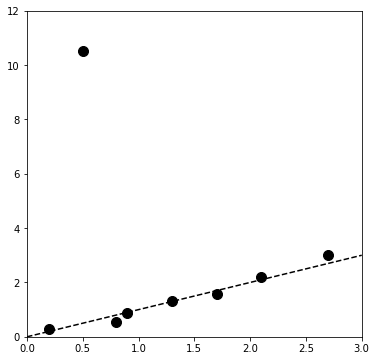

In [19]:
f = lambda x: x
x_tr = np.linspace(0., 3, 200)
y_tr = f(x_tr)
x = np.array([.2, .5, .8, .9, 1.3, 1.7, 2.1, 2.7])
y = f(x) + np.random.randn(len(x))/5
y[1]=y[1]+10
plt.figure(figsize=(6,6))
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,12])
plt.plot(x_tr, y_tr, '--k')
plt.plot(x, y, 'ok', ms=10)


In [18]:
points = np.column_stack((x,y))


array([[ 0.2       , -0.0974612 ],
       [ 0.5       , 10.24526837],
       [ 0.8       ,  0.66845005],
       [ 0.9       ,  1.04481043],
       [ 1.3       ,  1.19444766],
       [ 1.7       ,  1.75984467],
       [ 2.1       ,  2.21093762],
       [ 2.7       ,  2.27176094]])

         Current function value: 10.808951
         Iterations: 10
         Function evaluations: 324
         Gradient evaluations: 104
Optimization terminated successfully.
         Current function value: 77.312702
         Iterations: 2
         Function evaluations: 15
         Gradient evaluations: 5


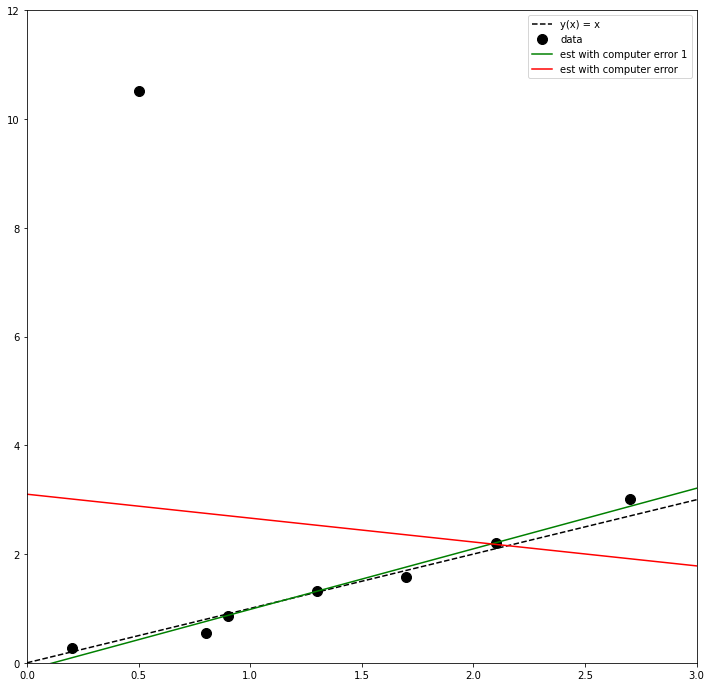

In [33]:
c_e_XY_7 = lambda params: computer_error_1(params[0],params[1],[x,y])
c_e_XY_8 = lambda params: computer_error(params[0],params[1],[x,y])
res1 = optimize.fmin_cg(c_e_XY_7,a0)
res2 = optimize.fmin_cg(c_e_XY_8,a0)
a1 = res1[0]
b1 = res1[1]
a2 = res2[0]
b2 = res2[1]

# functions estimated by minimizing two different computer_error cost function
f1 = lambda x: a1*x + b1
f2 = lambda x: a2*x + b2

y_est1 = f1(x_tr)
y_est2 = f2(x_tr)
plt.figure(figsize=(12,12))
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,12])

plt.plot(x_tr, y_tr, '--k',label='y(x) = x')
plt.plot(x, y, 'ok', ms=10,label='data')
plt.plot(x_tr,y_est1,'green',label='est with computer error 1')
# zauwazamy jak duzy wplyw na estymacje ma jeden punkt odczuwalnie odchylony od reszty rekordow. Podniesienie do kwadratu niestety powoduje
# tutaj powazne zaklocenie
plt.plot(x_tr,y_est2,'red',label='est with computer error')
plt.legend()
plt.show()